In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
#import r2
from sklearn.metrics import r2_score

import env
import wrangle as w
import explore as e
import prepare as p
import evaluate as eva

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get data
df = w.wrangle_zillow()
df

csv file found and loaded


,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
4,296425.0,4.0,2.0,3633.0,2005.0,LA,0,0
6,847770.0,3.0,4.0,1620.0,2011.0,LA,0,0
7,646760.0,3.0,2.0,2077.0,1926.0,LA,0,0
11,5328.0,0.0,0.0,1200.0,1972.0,LA,0,0
14,6920.0,0.0,0.0,171.0,1973.0,LA,0,0
...,...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,LA,0,0
2152858,960756.0,4.0,3.0,2262.0,2015.0,Orange,1,0
2152859,536061.0,4.0,4.5,3127.0,2014.0,Orange,1,0
2152861,424353.0,3.0,2.5,1974.0,2015.0,Orange,1,0


In [3]:
# split into train validate and test
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
731916,148309.0,3.0,2.0,1488.0,1980.0,LA,0,0
1286889,199476.0,2.0,1.0,864.0,1947.0,LA,0,0
1105466,921624.0,4.0,3.0,2532.0,1987.0,LA,0,0
1535462,311969.0,2.0,1.0,1144.0,1951.0,LA,0,0
1948233,1155354.0,3.0,3.5,2840.0,2005.0,Orange,1,0
...,...,...,...,...,...,...,...,...
1650719,96289.0,1.0,1.0,811.0,1942.0,LA,0,0
592897,870000.0,4.0,3.5,2468.0,1981.0,Ventura,0,1
1483205,649000.0,4.0,3.0,2610.0,1982.0,Orange,1,0
1478881,44892.0,3.0,1.0,1264.0,1942.0,LA,0,0


In [4]:
## scale
X_train_scaled, X_validate_scaled, X_validate_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)
X_train_scaled

,bedrooms,bathrooms,sqft,built,Orange,Ventura
731916,0.1875,0.100,0.297459,0.832558,0.0,0.0
1286889,0.1250,0.050,0.172635,0.679070,0.0,0.0
1105466,0.2500,0.150,0.506301,0.865116,0.0,0.0
1535462,0.1250,0.050,0.228646,0.697674,0.0,0.0
1948233,0.1875,0.175,0.567914,0.948837,1.0,0.0
...,...,...,...,...,...,...
1650719,0.0625,0.050,0.162032,0.655814,0.0,0.0
592897,0.2500,0.175,0.493499,0.837209,0.0,1.0
1483205,0.2500,0.150,0.521904,0.841860,1.0,0.0
1478881,0.1875,0.050,0.252651,0.655814,0.0,0.0


In [5]:
y_train


731916      148309.0
1286889     199476.0
1105466     921624.0
1535462     311969.0
1948233    1155354.0
             ...    
1650719      96289.0
592897      870000.0
1483205     649000.0
1478881      44892.0
1858243     817801.0
Name: taxvalue, Length: 1254875, dtype: float64

RMSE: 296630.81, R^2: 0.07 for ('bedrooms',)
RMSE: 267699.03, R^2: 0.24 for ('bathrooms',)
RMSE: 252915.97, R^2: 0.32 for ('sqft',)
RMSE: 296262.64, R^2: 0.07 for ('built',)
RMSE: 304871.10, R^2: 0.02 for ('Orange',)
RMSE: 307358.31, R^2: 0.00 for ('Ventura',)
RMSE: 267112.80, R^2: 0.24 for ('bedrooms', 'bathrooms')
RMSE: 250389.61, R^2: 0.34 for ('bedrooms', 'sqft')
RMSE: 291334.06, R^2: 0.10 for ('bedrooms', 'built')
RMSE: 295202.63, R^2: 0.08 for ('bedrooms', 'Orange')
RMSE: 296625.67, R^2: 0.07 for ('bedrooms', 'Ventura')
RMSE: 252468.62, R^2: 0.33 for ('bathrooms', 'sqft')
RMSE: 267687.29, R^2: 0.24 for ('bathrooms', 'built')
RMSE: 267110.71, R^2: 0.24 for ('bathrooms', 'Orange')
RMSE: 267679.43, R^2: 0.24 for ('bathrooms', 'Ventura')
RMSE: 252902.18, R^2: 0.32 for ('sqft', 'built')
RMSE: 252565.59, R^2: 0.32 for ('sqft', 'Orange')
RMSE: 252837.51, R^2: 0.32 for ('sqft', 'Ventura')
RMSE: 295833.47, R^2: 0.07 for ('built', 'Orange')
RMSE: 296128.54, R^2: 0.07 for ('built', 'Ventura

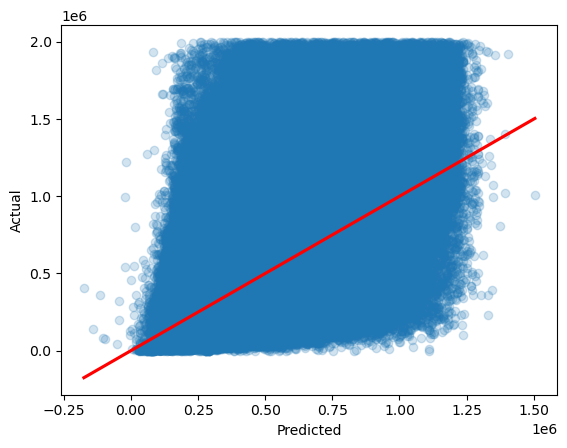

Best RMSE: 248530.55 for ('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')
Best R^2: 0.35 for ('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')


('bedrooms', 'bathrooms', 'sqft', 'built', 'Orange', 'Ventura')

In [6]:
# Run regression through all possible combinations. Select and graph best model.
eva.run_regression1(X_train_scaled, y_train) 
